#  Scores for XGBoost + Logistic Regression (Initial) model

After calculating the accuracy, sensitivity and specificity for various raw models, we next found the most significant features using XGBoost to be *E7*, *E9*, *E10*, *V1* and *V11*, as can be seen from \_\_. We'll now be calculating the relevant metrics using a Logistics Regression model on these features.

## Loading the Dataset

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import GridSearchCV #to find the optimal C value for the LogReg model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df=pd.read_csv('fordTrain.csv')
df1=pd.read_csv('fordTest.csv')

df=df.drop(['P8','V7','V9'],axis=1)
df1=df1.drop(['P8','V7','V9'],axis=1)
#df=df.drop(['TrialID','ObsNum','P8','V7','V9'],axis=1) 
#df1=df1.drop(['TrialID','ObsNum','P8','V7','V9'],axis=1)

Y_train=df.ix[:,'IsAlert'].copy()
X_train=df.drop(['IsAlert'],axis=1)

Y_test=df1.ix[:,'IsAlert'].copy()
X_test=df1.drop(['IsAlert'],axis=1)

/home/arjun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/home/arjun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [2]:
df.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.0,101.96,0.175,752,5.99375,0,2005,13.4,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.0,101.98,0.455,752,5.99375,0,2007,13.4,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.0,101.97,0.280,752,5.99375,0,2011,13.4,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.0,101.99,0.070,752,5.99375,0,2015,13.4,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.0,102.07,0.175,752,5.99375,0,2017,13.4,4,14.7757


____
## Logistic Regression Model

In [3]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
parameters = { 'C':[1, 10]}
model = GridSearchCV(clf, parameters,cv=10,scoring='roc_auc')

In [4]:
X_train=X_train.ix[:,['E7','E9','E10','V1','V11']].copy()
X_test=X_test.ix[:,['E7','E9','E10','V1','V11']].copy()

/home/arjun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/arjun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [5]:
model.fit(X_train,Y_train)
print("train accuracy => ",accuracy_score(model.predict(X_train),Y_train))
print("test accuracy => ",accuracy_score(model.predict(X_test),Y_test))

train accuracy =>  0.763933221805
test accuracy =>  0.882050645482


In [6]:
Y_pred_prob=model.predict_proba(X_test)[:,1]

In [7]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred_prob)

0.80025768750503734

In [8]:
def specandsens(a): # Utility function to calculate specificity and sensitivity
    sens=a[1][1]/(a[1][1]+a[1][0])
    spec=a[0][0]/(a[0][0]+a[0][1])
    return spec,sens

In [9]:
confmatrix=confusion_matrix(Y_test, model.predict(X_test))
spec,sens=specandsens(confmatrix)
print(f'specificity is {spec} and sensitivity is {sens}')

specificity is 0.5284147890619777 and sensitivity is 0.9983942986604492


____
## ROC curve

In [10]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [11]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred_prob)
roc_auc = auc(fpr, tpr)

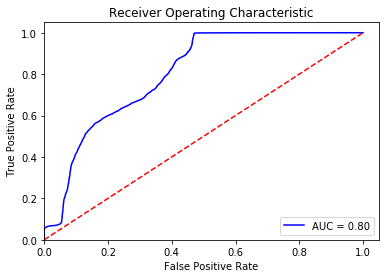

In [12]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#plt.savefig('roc.png')

____
____